In [1]:
from glob import glob
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
file_list=glob('/content/drive/My Drive/Projects/Handwriting recognizer/ImagesPart1/*.jpg')

In [4]:
def crop(img,bbox):
  bbox=np.array(bbox)
  bbox=bbox.reshape(4,2)
  topleft_x = np.min(bbox[:,0])
  topleft_y = np.min(bbox[:,1])
  bot_right_x = np.max(bbox[:,0])
  bot_right_y = np.max(bbox[:,1])
  cropped_img = img[topleft_y:bot_right_y, topleft_x:bot_right_x]
  return cropped_img


def get_hindi_crops(annotation_list):
  cnt=1
  for file in annotation_list:
    contents=open(file).readlines()
    for annotation in contents:
      meta=annotation.split(',')
      lang=meta[-2].strip()
      label=meta[-1].split('\n')[0].strip()
      if lang=='Hindi' and label!='###':
        filename=file.split('/')[-1].split('.')[0]
        path=f'/content/drive/My Drive/Projects/Handwriting recognizer/ImagesPart1/{filename}.jpg'
        if os.path.exists(path):
          img=cv2.imread(path)
          bbox=[int(i) for i in meta[0:8]]
          cropped_img=crop(img,bbox)
          try:
            cv2.imwrite(f'/content/drive/My Drive/Projects/Handwriting recognizer/Images/{cnt}_{label}.jpg',cropped_img)
          except:
            print(path,label)
          if cnt<10:
            print(label)
            plt.imshow(cropped_img)
          cnt+=1


कै.
गोपाळराव
महादेव
शिंदे
पथ
काका
हलवाई
स्वीट
सेंटर
/content/drive/My Drive/Projects/Handwriting recognizer/ImagesPart1/tr_img_09894.jpg शारदा
/content/drive/My Drive/Projects/Handwriting recognizer/ImagesPart1/tr_img_09673.jpg शिव


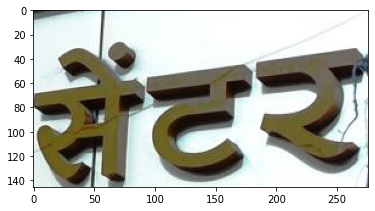

In [5]:
annotation_list=glob('/content/drive/My Drive/Projects/Handwriting recognizer/Annotations/*.txt')
get_hindi_crops(annotation_list)

In [6]:
len(os.listdir('/content/drive/My Drive/Projects/Handwriting recognizer/Images/'))

3718